# Library and Data Setup

In [1]:
# Packages Library

import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import regex as re

In [2]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
# Table Display Setup: Show All Columns

pd.set_option('display.max_columns', None)

## Dataset

1. 'df' for employees' general data
2. 'df_employee_survey' for employees' survey data for the office
3. 'df_manager_survey' for managers' survey data foe the employees
4. 'df_in_time' containing the data of the time the employees arrived at the office
5. 'df_out_time' containing the data of the time they left the office
6. 'df_working_hours' containing number of hours the employees spent at the office (u can get automatically by the mounting, or extract it manually by the process)

In [4]:
# Data Mounting

# df
df = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/general_data.csv')
# df_employee_survey
df_employee_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/employee_survey_data.csv')
# df_manager_survey
df_manager_survey = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/manager_survey_data.csv')
# df_in_time
df_in_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/in_time.csv')
# df_out_time
df_out_time = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/out_time.csv')
# df_working_hours
# df_working_hours = pd.read_csv('/content/drive/MyDrive/Kerja/Rakamin Bootcamp/Final Project/Dataset/df_working_hours.csv')

# EDA

Exploratory Data Analysis

## df

In [5]:
# Getting Features' Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
# Data Preview
df.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3


### Features Grouping

In [7]:
# Numeric Type Data
num_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'TotalWorkingYears',
                   'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
                   'YearsWithCurrManager']

# Categoric or Non-Numeric Type Data
cat_columns = df.columns[~df.columns.isin(num_columns) & ~df.columns.isin(['EmployeeID'])]

# Categoric Data with Single Value
single_value_columns = []

for column_name in cat_columns:
  if df[column_name].nunique() == 1:
    single_value_columns.append(column_name)

# Ordinal Categoric Data
# Some data are already in numeric values, means its ordered values.
num_type = ['int64', 'float64']
ordinal_cat_columns = []

for column_name in cat_columns:
  if column_name not in single_value_columns:
    if df[column_name].dtype in num_type:
      ordinal_cat_columns.append(column_name)

cat_columns = cat_columns[(~cat_columns.isin(ordinal_cat_columns))]

# Nominal Categoric Data with >2 Unique Values
ohe_columns = []

for column_name in cat_columns:
  if df[column_name].nunique() > 2:
    ohe_columns.append(column_name)

# Nominal Categoric Data with 2 Unique Values
binary_columns = cat_columns[(~cat_columns.isin(ohe_columns)) & (~cat_columns.isin(single_value_columns))]

In [8]:
print(f'numeric_columns: {num_columns}')
print(f'cat_columns: {cat_columns}')
print(f'single_value_columns: {single_value_columns}')
print(f'ordinal_cat_columns: {ordinal_cat_columns}')
print(f'ohe_columns: {ohe_columns}')
print(f'binary_columns: {binary_columns}')

numeric_columns: ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_columns: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EmployeeCount', 'Gender', 'JobRole', 'MaritalStatus', 'Over18',
       'StandardHours'],
      dtype='object')
single_value_columns: ['EmployeeCount', 'Over18', 'StandardHours']
ordinal_cat_columns: ['Education', 'JobLevel', 'StockOptionLevel']
ohe_columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
binary_columns: Index(['Attrition', 'Gender'], dtype='object')


In [9]:
# Show Each Categoric Features' Values
for column_name in cat_columns:
  print(f'{column_name}: {df[column_name].unique()}')

Attrition: ['No' 'Yes']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EmployeeCount: [1]
Gender: ['Female' 'Male']
JobRole: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus: ['Married' 'Single' 'Divorced']
Over18: ['Y']
StandardHours: [8]


### df: Features Cleansing and Conversion

Deleting features with single value

In [10]:
# To-Categoric Conversion
df[cat_columns] = df[cat_columns].astype('category')
df.drop(columns=single_value_columns, inplace=True)

# Drop Features with Single Value
cat_columns = cat_columns.drop(single_value_columns)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   EmployeeID               4410 non-null   int64   
 8   Gender                   4410 non-null   category
 9   JobLevel                 4410 non-null   int64   
 10  JobRole                  4410 non-null   category
 11  MaritalStatus            4410 non-null   category
 12  MonthlyIncome            4410 non-null   int64   
 13  NumCompaniesWorked       4391 non-null   float64 
 14  PercentS

### df: Univariate Analysis

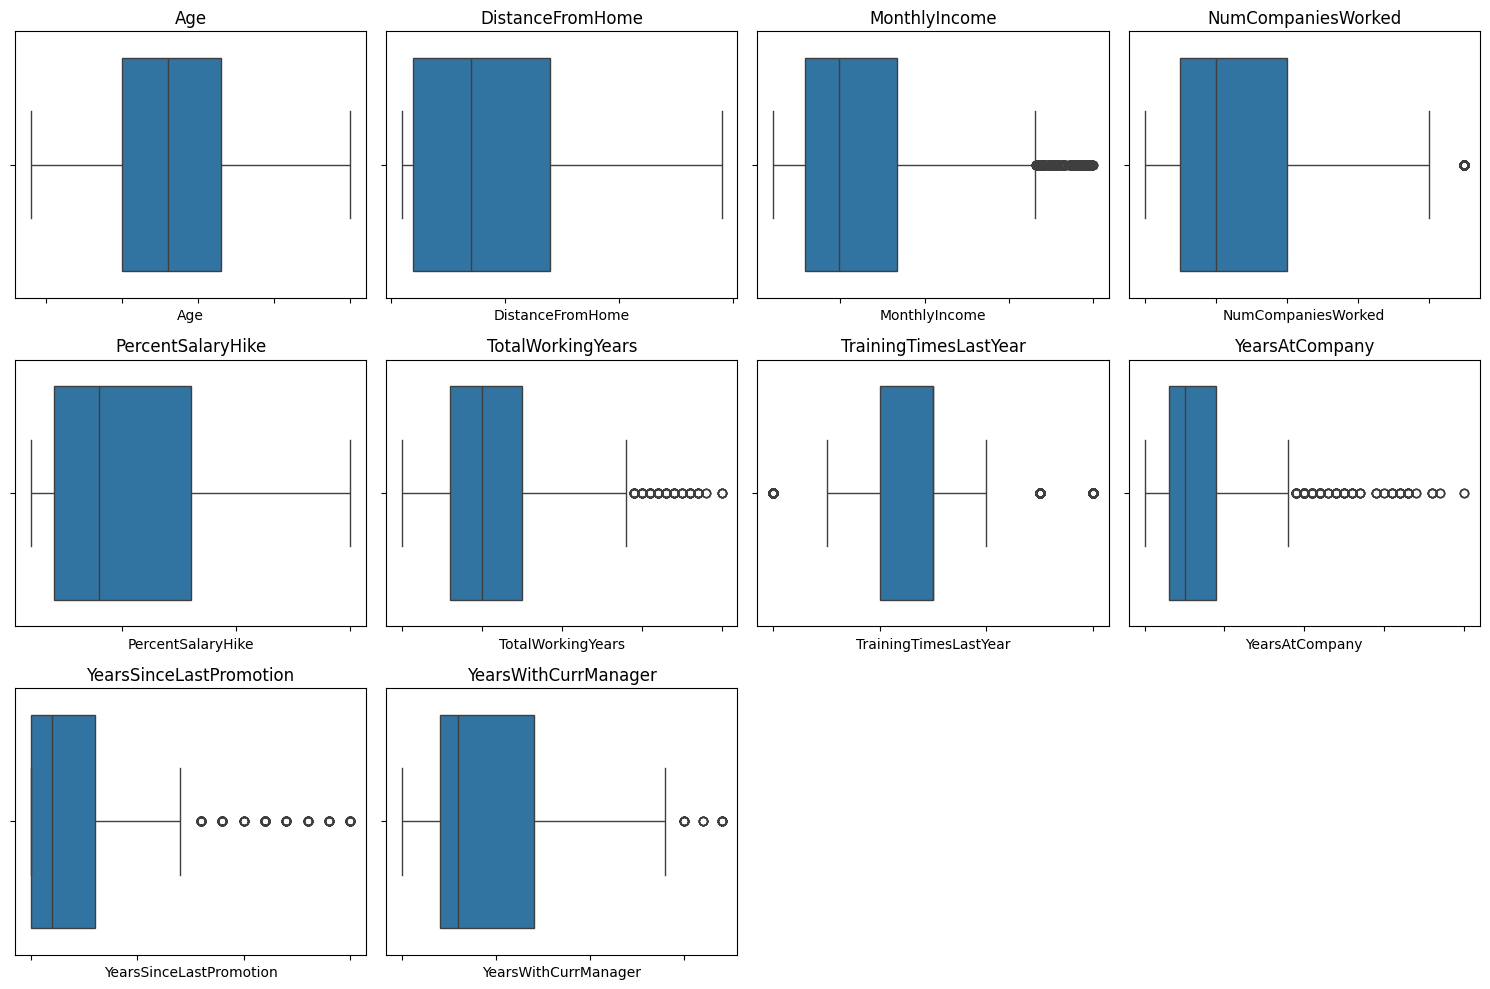

In [12]:
# Numeric Type Data Distribution through Box Plot
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

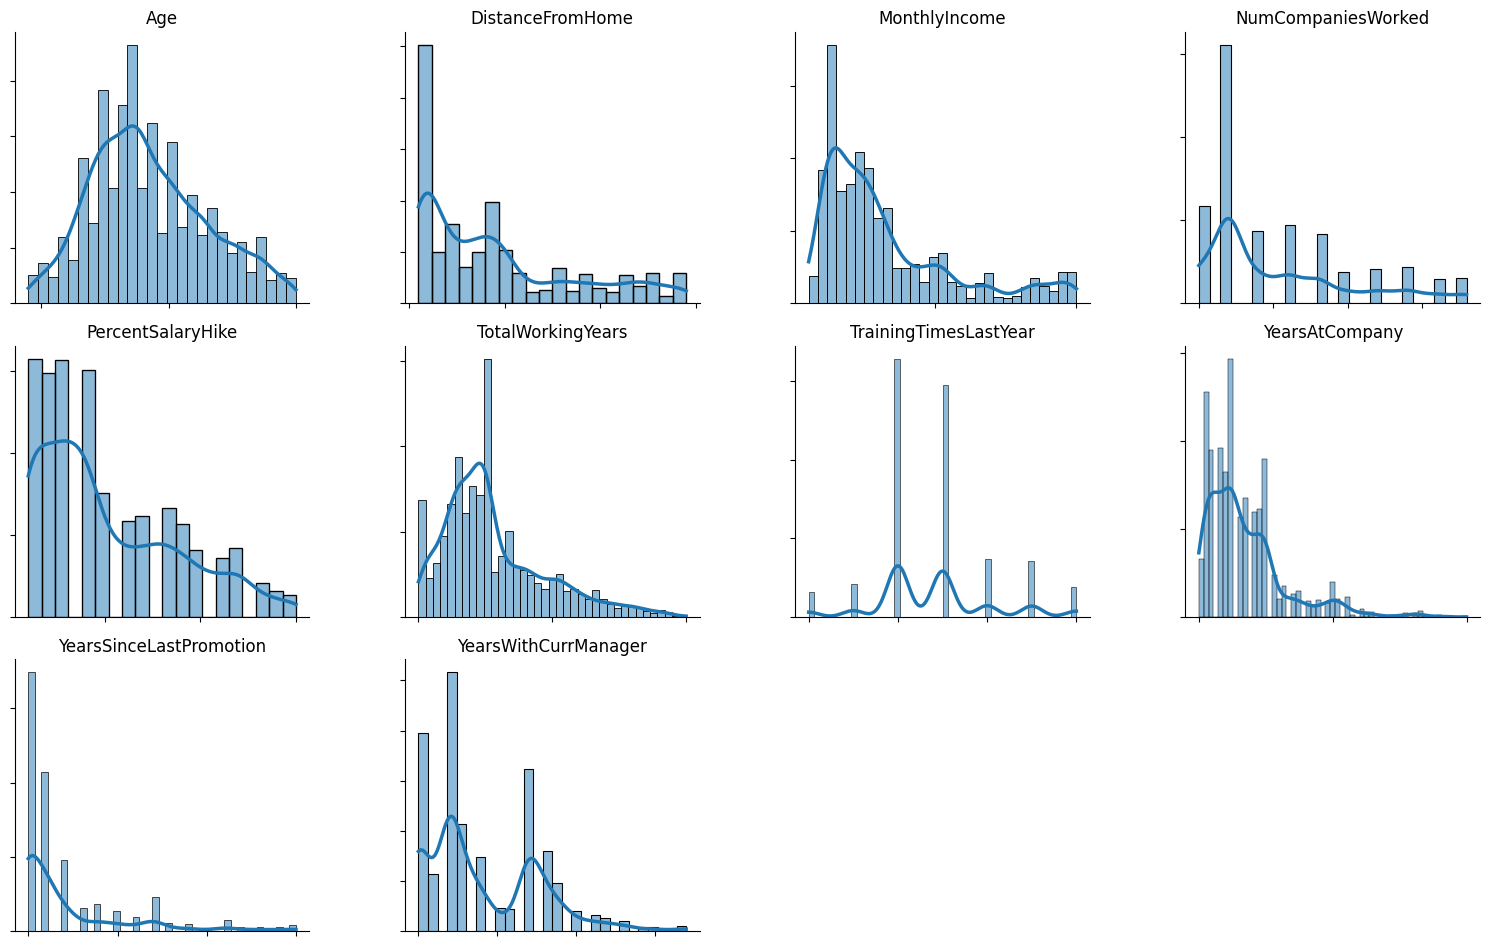

In [13]:
# Numeric Type Data Distribution through Normality Graph
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=df[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

### df: Multivariate Analysis

Since we don't wants to encode those categoric features, make sure to make a copy first to be processed.

In [14]:
# df's Copy
df_2 = df.copy()

In [15]:
# Get Code Encoding
for column in cat_columns:
  df_2[column] = df_2[column].astype('category')
  df_2[column] = df_2[column].cat.codes

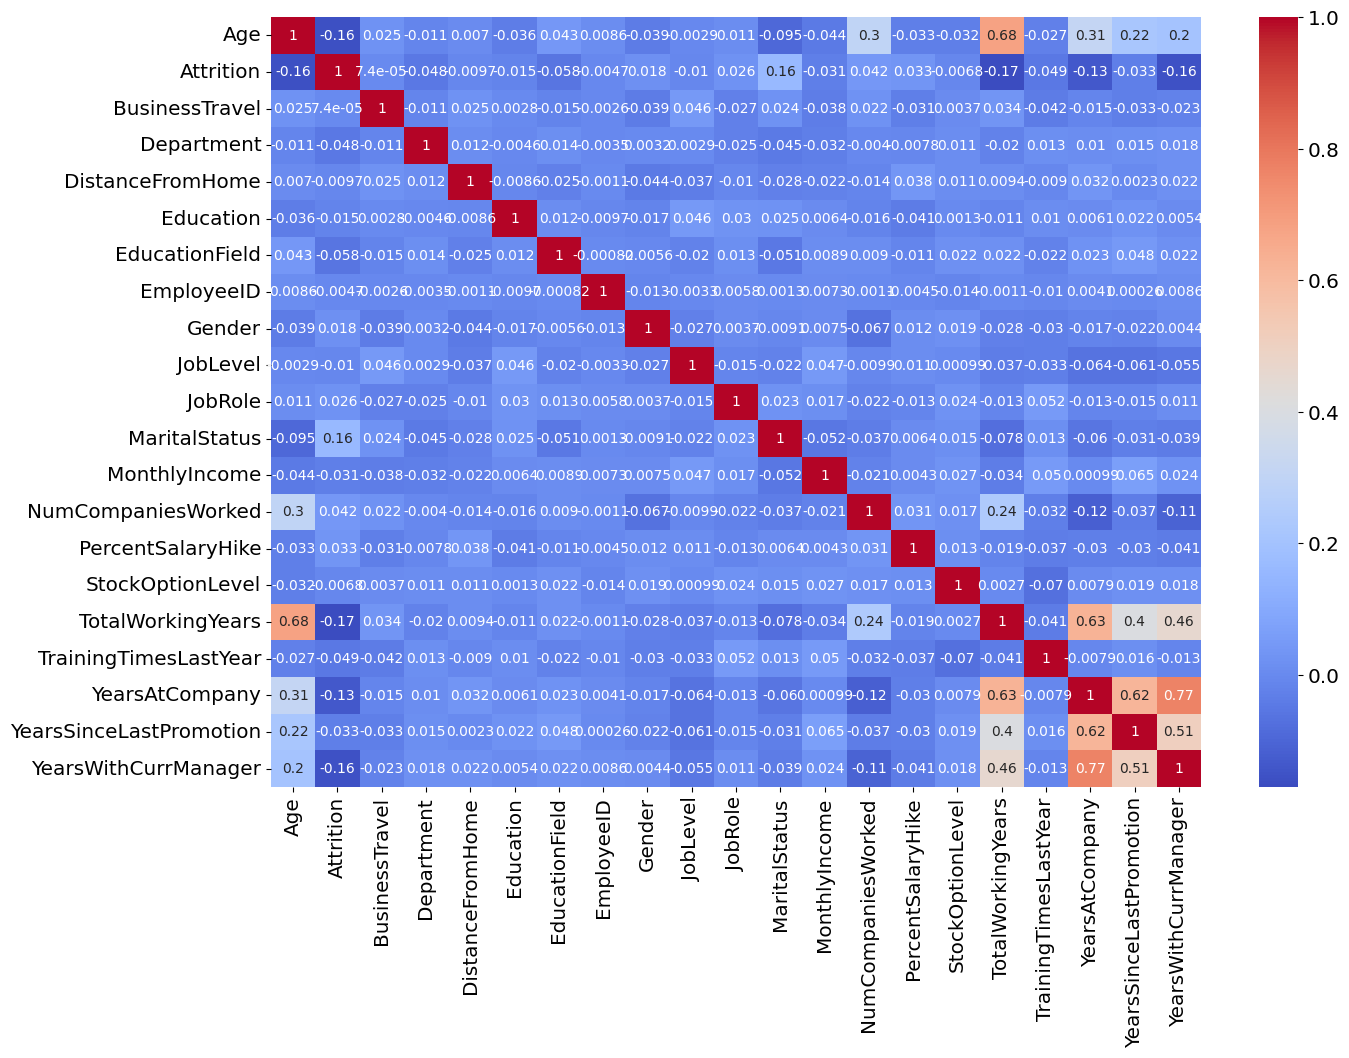

In [16]:
# Heatmap Correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm')
plt.show()

## df_employee_survey

In [17]:
# Getting Features' Info
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [18]:
from pandas.api.types import CategoricalDtype

# Declare The Order to Order The Ordinals
ordered_categories = [1, 2, 3, 4]

# Apply
for column in df_employee_survey.columns[1:]:
  df_employee_survey[column] = df_employee_survey[column].astype(CategoricalDtype(categories=ordered_categories, ordered=True))

In [19]:
df_employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4385 non-null   category
 2   JobSatisfaction          4390 non-null   category
 3   WorkLifeBalance          4372 non-null   category
dtypes: category(3), int64(1)
memory usage: 48.1 KB


In [20]:
# Describe
df_employee_survey.describe(include='category')

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4385,4390,4372
unique,4,4,4
top,3,4,3
freq,1350,1367,2660


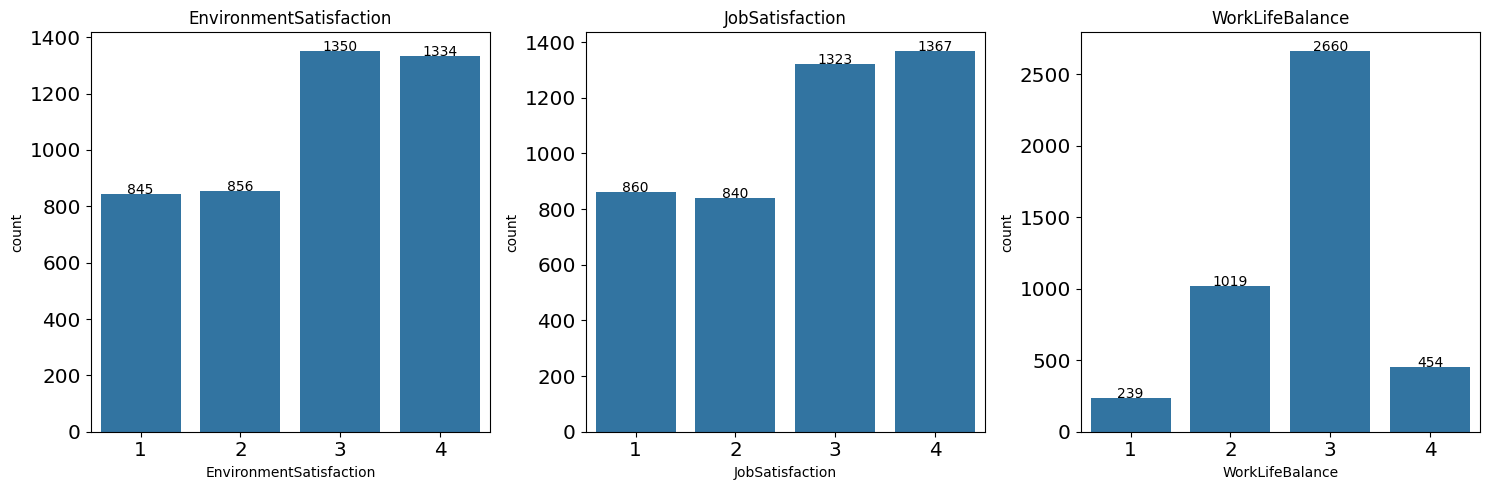

In [21]:
# Data Visualization
df_employee_survey_2 = df_employee_survey.copy()
df_employee_survey_2 = df_employee_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_employee_survey_2.columns), 5))
for i, column in enumerate(df_employee_survey_2.columns):
  plt.subplot(1, len(df_employee_survey_2.columns), i + 1)
  sns.countplot(x=df_employee_survey_2[column])
  plt.title(column)
  total = len(df_employee_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_manager_survey

In [22]:
# Getting Features' Info
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [23]:
# Declare The Order
ordered_categories = [1, 2, 3, 4]

# Apply
for column in df_manager_survey.columns[1:]:
  df_manager_survey[column] = df_manager_survey[column].astype(CategoricalDtype(categories=ordered_categories, ordered=True))

In [24]:
df_manager_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   EmployeeID         4410 non-null   int64   
 1   JobInvolvement     4410 non-null   category
 2   PerformanceRating  4410 non-null   category
dtypes: category(2), int64(1)
memory usage: 43.6 KB


In [25]:
# Describe
df_manager_survey.describe(include='category')

,JobInvolvement,PerformanceRating
count,4410,4410
unique,4,2
top,3,3
freq,2604,3732


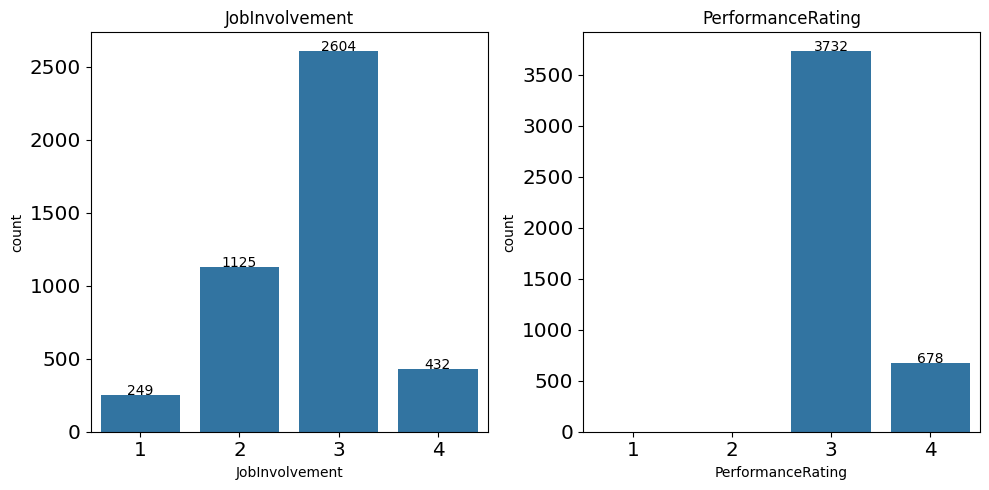

In [26]:
# Data Visualization

df_manager_survey_2 = df_manager_survey.copy()
df_manager_survey_2 = df_manager_survey_2.drop(columns='EmployeeID')

plt.figure(figsize=(5 * len(df_manager_survey_2.columns), 5))
for i, column in enumerate(df_manager_survey_2.columns):
  plt.subplot(1, len(df_manager_survey_2.columns), i + 1)
  sns.countplot(x=df_manager_survey_2[column])
  plt.title(column)
  total = len(df_manager_survey_2[column])
  for p in plt.gca().patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.annotate(int(count), (x, y), ha='center')

plt.tight_layout()
plt.show()

## df_in_time

In [27]:
# Data Preview
df_in_time.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [28]:
# Columns' Rename
df_in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [29]:
# Replace NA with 'Tidak Hadir', means 'absence'
for i in df_in_time:
  df_in_time[i] = df_in_time[i].replace(np.nan, 'Tidak Hadir')

In [30]:
# Drop EmployeeID
df_in_time.drop(columns = 'EmployeeID', inplace= True)

In [31]:
# Make a list of time-in
time_in = []

# Loop through the data to get the time data
for i, j in df_in_time.iterrows():
  for k in j.values:
    # Take those non 'Tidak Hadir' value
    if k != 'Tidak Hadir':
      time_in.append(k)

## df_out_time

In [32]:
# Data Preview
df_out_time.head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [33]:
# Column's Rename
df_out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)

In [34]:
# Replace NA with 'Tidak Hadir', means 'absence'
for i in df_out_time:
  df_out_time[i] = df_out_time[i].replace(np.nan, 'Tidak Hadir')

In [35]:
# Drop EmployeeID
df_out_time.drop(columns = 'EmployeeID', inplace= True)

In [36]:
# Make a list of time-out
time_out = []

# Loop through the data to get the time data
for i, j in df_out_time.iterrows():
  for k in j.values:
    # Take those non 'Tidak Hadir' value
    if k != 'Tidak Hadir':
      time_out.append(k)

# Data Extraction: Employee Working Hours (df_working_hours)

In [37]:
# Declare the time pattern
time_pattern = r"\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}"

In [38]:
# time into dataframe

time_in = pd.DataFrame(time_in)
time_out = pd.DataFrame(time_out)

time_in.rename(columns={0:'time_in'}, inplace=True)
time_out.rename(columns={0:'time_out'}, inplace=True)

# convert into datetime

time_in = pd.to_datetime(time_in['time_in'])
time_out = pd.to_datetime(time_out['time_out'])

# time difference

time_diff = time_out - time_in
time_diff = time_diff.dt.total_seconds() / 3600
time_diff = round(time_diff, 1)

# get data to replace

df_working_hours = df_out_time.copy()

# value replace
## into working hours
replaced = 0

for i in range(len(df_working_hours)):
  for j in df_working_hours.columns:
    value = df_working_hours.at[i, j]
    if isinstance(value, str) and re.fullmatch(time_pattern, value):
      if replaced < len(time_diff):
        df_working_hours.at[i, j] = time_diff[replaced]
        replaced += 1

## absent
for index in df_working_hours.index:
  for col in df_working_hours.columns:
    if df_working_hours.at[index, col] == 'Tidak Hadir':
      df_working_hours.at[index, col] = 0

# insert average employee working hours
df_working_hours['avg_working_hours'] = df_working_hours.mean(axis= 1)

# insert employeeid
df_working_hours.insert(loc=0, column='EmployeeID', value=df['EmployeeID'])

In [39]:
# Data Preview
df_working_hours.head(3)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31,avg_working_hours
0,1,0,7.2,7.2,7.4,7.0,7.3,7.5,7.3,7.8,0,7.3,7.3,0,6.8,7.1,7.1,7.6,0,7.6,7.1,7.4,6.8,6.9,7.2,7.6,7.6,7.5,7.6,7.3,7.2,7.4,7.2,7.6,7.4,7.8,0,7.8,7.4,7.2,7.6,7.2,7.4,7.2,6.8,7.7,0,7.8,7.4,6.9,7.2,7.1,7.3,0,6.9,7.2,7.8,7.2,7.6,7.3,7.4,0,7.6,7.4,7.9,7.3,7.7,7.2,7.0,7.6,7.4,7.8,7.1,7.3,7.1,7.5,7.8,7.3,7.7,7.0,7.5,7.3,7.6,7.2,7.9,7.7,7.5,0,7.4,7.3,7.5,7.1,7.6,0,7.4,7.5,7.9,6.8,0,7.3,7.3,7.5,7.1,7.6,7.2,7.9,7.4,0,0,7.7,7.5,7.0,0,7.1,0,7.1,7.6,7.4,7.6,7.5,7.5,7.5,7.2,7.2,6.9,7.1,7.8,7.1,7.7,7.3,7.7,7.6,7.2,7.9,7.7,7.5,6.9,7.4,7.3,7.1,7.6,7.3,0,7.1,7.3,7.9,6.7,7.5,7.5,6.7,7.1,7.2,7.4,6.9,7.2,7.7,7.5,7.4,7.6,7.5,7.6,7.4,7.1,7.1,7.6,6.9,7.2,7.7,7.5,7.4,7.7,7.7,7.6,7.0,0,7.2,7.4,7.5,7.4,7.3,7.5,7.4,7.3,6.9,7.1,7.3,0,7.5,7.4,7.7,7.0,7.3,7.7,7.6,7.6,7.4,7.8,0,7.0,7.7,7.4,7.5,7.6,7.2,0,7.5,7.6,6.8,7.5,7.0,0,0,7.2,7.7,7.1,7.7,7.1,7.3,6.9,7.6,6.9,7.6,7.0,0,0,0,7.2,7.3,7.8,7.1,7.4,7.0,7.8,7.3,7.6,7.4,7.4,7.1,7.0,7.4,7.6,7.6,7.1,6.9,7.9,7.9,7.2,7.7,7.5,0,7.6,0,0,7.3,7.4,6.5,7.6,0,7.8,7.3,7.8,7.1,6.55249
1,2,0,8.1,7.5,0,7.4,7.4,7.2,7.6,7.3,0,7.6,7.7,7.6,7.6,7.9,7.4,7.8,0,7.5,7.2,7.3,7.1,7.6,7.6,7.6,7.6,7

## df_working_hours: EDA

In [40]:
# separation by attrition status

df_working_hours_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 'Yes']['EmployeeID'])]
df_working_hours_not_resigned = df_working_hours[df_working_hours['EmployeeID'].isin(df[df['Attrition'] == 'No']['EmployeeID'])]

df_working_hours_resigned = df_working_hours_resigned.drop(columns=['EmployeeID', 'avg_working_hours'])
df_working_hours_not_resigned = df_working_hours_not_resigned.drop(columns=['EmployeeID', 'avg_working_hours'])

# transpose

df_working_hours_resigned = df_working_hours_resigned.transpose()
df_working_hours_not_resigned = df_working_hours_not_resigned.transpose()

# getting its average

df_working_hours_not_resigned['mean'] = df_working_hours_not_resigned.mean(axis=1)
df_working_hours_resigned['mean'] = df_working_hours_resigned.mean(axis=1)

# average cleansing

df_working_hours_resigned = df_working_hours_resigned[df_working_hours_resigned['mean'] != 0]
df_working_hours_not_resigned = df_working_hours_not_resigned[df_working_hours_not_resigned['mean'] != 0]

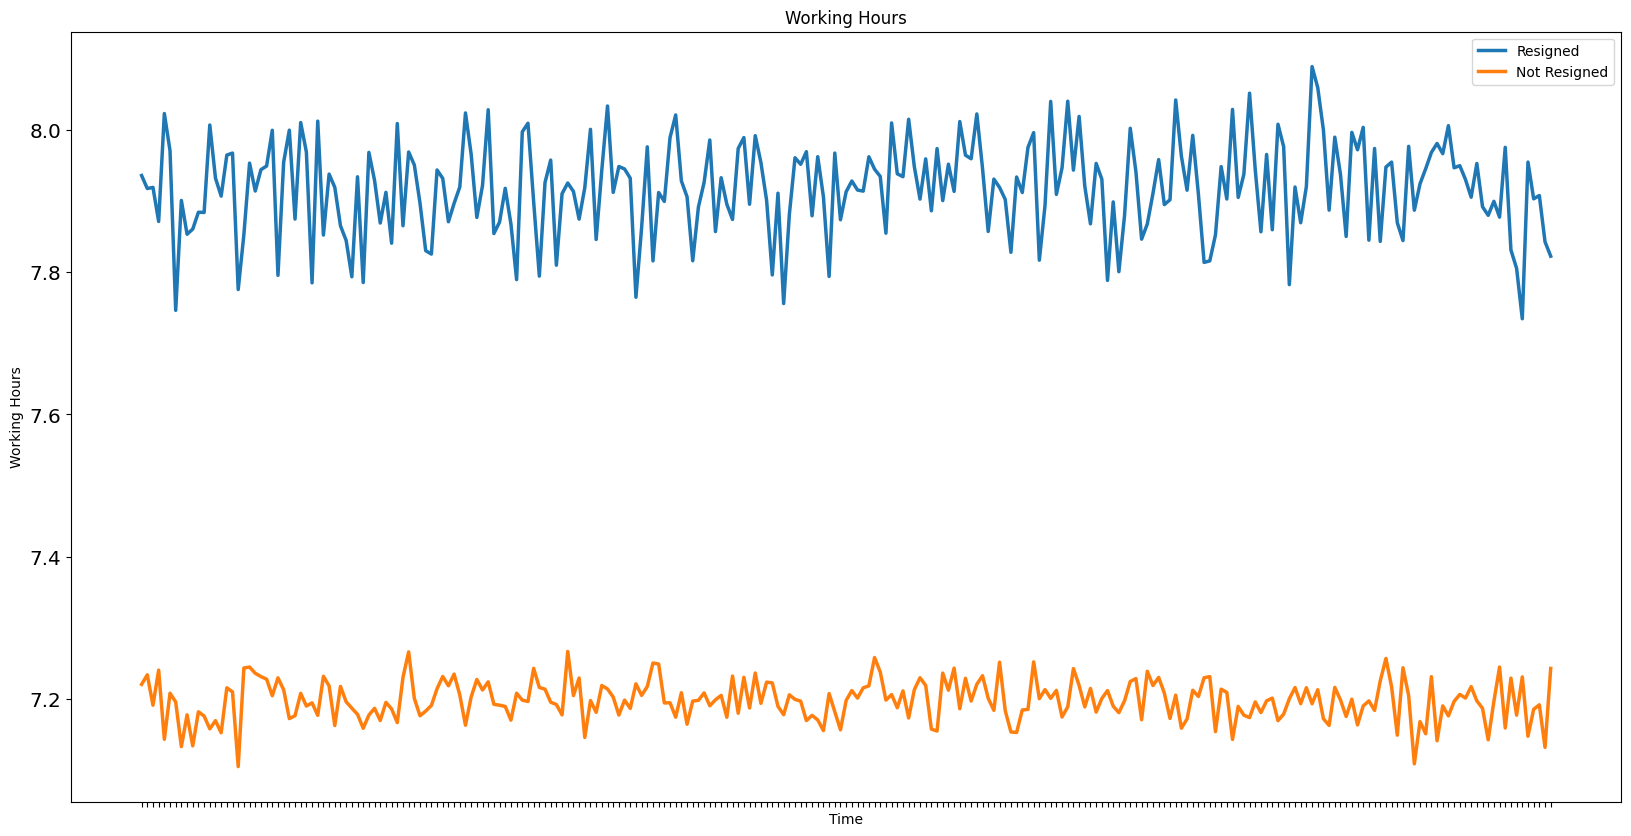

In [41]:
# Data Visualization
plt.figure(figsize=(20, 10))
plt.plot(df_working_hours_resigned.index, df_working_hours_resigned['mean'], label='Resigned')
plt.plot(df_working_hours_not_resigned.index, df_working_hours_not_resigned['mean'], label='Not Resigned')
plt.xlabel('Time')
plt.ylabel('Working Hours')
plt.title('Working Hours')
plt.xticks(visible=False)
plt.legend()
plt.show()

# Data Merge: all_df

In [42]:
'''
Merge all the data in purpose to see everything about those employees
'''
all_df = pd.merge(df, df_employee_survey, on='EmployeeID', how='left')
all_df = pd.merge(all_df, df_manager_survey, on='EmployeeID', how='left')
all_df['AvgWorkingHours'] = df_working_hours['avg_working_hours'].astype(float)
all_df.drop(columns=['EmployeeID'], inplace=True)

In [43]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4410 non-null   int64   
 1   Attrition                4410 non-null   category
 2   BusinessTravel           4410 non-null   category
 3   Department               4410 non-null   category
 4   DistanceFromHome         4410 non-null   int64   
 5   Education                4410 non-null   int64   
 6   EducationField           4410 non-null   category
 7   Gender                   4410 non-null   category
 8   JobLevel                 4410 non-null   int64   
 9   JobRole                  4410 non-null   category
 10  MaritalStatus            4410 non-null   category
 11  MonthlyIncome            4410 non-null   int64   
 12  NumCompaniesWorked       4391 non-null   float64 
 13  PercentSalaryHike        4410 non-null   int64   
 14  StockOpt

## Target n Features Separation

In [44]:
'''
x is the features
y is the target
'''
x = all_df.drop(columns=['Attrition'])
y = all_df['Attrition']

## Data Splitting

In [45]:
from sklearn.model_selection import train_test_split

'''
Split into 8:2
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3528, 25), (882, 25), (3528,), (882,))

## Advanced Features Grouping

In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 2588 to 860
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      3528 non-null   int64   
 1   BusinessTravel           3528 non-null   category
 2   Department               3528 non-null   category
 3   DistanceFromHome         3528 non-null   int64   
 4   Education                3528 non-null   int64   
 5   EducationField           3528 non-null   category
 6   Gender                   3528 non-null   category
 7   JobLevel                 3528 non-null   int64   
 8   JobRole                  3528 non-null   category
 9   MaritalStatus            3528 non-null   category
 10  MonthlyIncome            3528 non-null   int64   
 11  NumCompaniesWorked       3512 non-null   float64 
 12  PercentSalaryHike        3528 non-null   int64   
 13  StockOptionLevel         3528 non-null   int64   
 14  TotalWorkin

In [48]:
'''
Since the data are merged, the features have to be separated for further processing
'''
num_columns_2 = x_train.select_dtypes(include=['int64', 'float64']).columns
num_columns_2 = num_columns_2.drop(ordinal_cat_columns)

cat_columns_2 = x_train.columns[~x_train.columns.isin(num_columns_2)]

In [49]:
print(f'num_columns_2: {num_columns_2}')
print(f'cat_columns_2: {cat_columns_2}')

num_columns_2: Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AvgWorkingHours'],
      dtype='object')
cat_columns_2: Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


In [50]:
# To see each categoric features' values
for column_name in cat_columns_2:
  print(f'{column_name}: {x_train[column_name].unique()}')

BusinessTravel: ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']
Categories (3, object): ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department: ['Research & Development', 'Sales', 'Human Resources']
Categories (3, object): ['Human Resources', 'Research & Development', 'Sales']
Education: [4 2 3 1 5]
EducationField: ['Life Sciences', 'Technical Degree', 'Human Resources', 'Medical', 'Marketing', 'Other']
Categories (6, object): ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
                         'Technical Degree']
Gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
JobLevel: [1 2 5 4 3]
JobRole: ['Sales Representative', 'Research Scientist', 'Laboratory Technician', 'Manager', 'Sales Executive', 'Research Director', 'Healthcare Representative', 'Manufacturing Director', 'Human Resources']
Categories (9, object): ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', ...,
                         'Re

In [51]:
'''
if u think about it, BusinessTravel's values are ordinal.
So there goes the values mapping.
'''
# Mapping
business_travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

# Apply
x_train['BusinessTravel'] = x_train['BusinessTravel'].map(business_travel_map)
x_test['BusinessTravel'] = x_test['BusinessTravel'].map(business_travel_map)

In [52]:
# Ordinal Mapping
order = [1, 2, 3, 4]

# Post-Merged Ordinal Categoric Columns
ordinal_cat_columns_2 = []

for col in cat_columns_2:
  if x_train[col].isin(order).any():
    ordinal_cat_columns_2.append(col)

# Post-Merged Nominal Categoric Columns
ohe_columns_2 = cat_columns_2[(~cat_columns_2.isin(ordinal_cat_columns_2))]

In [53]:
# Conversion
x_train[ordinal_cat_columns_2] = x_train[ordinal_cat_columns_2].astype('category')
x_test[ordinal_cat_columns_2] = x_test[ordinal_cat_columns_2].astype('category')

x_train[ohe_columns_2] = x_train[ohe_columns_2].astype('category')
x_test[ohe_columns_2] = x_test[ohe_columns_2].astype('category')

In [54]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528 entries, 2588 to 860
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      3528 non-null   int64   
 1   BusinessTravel           3528 non-null   category
 2   Department               3528 non-null   category
 3   DistanceFromHome         3528 non-null   int64   
 4   Education                3528 non-null   category
 5   EducationField           3528 non-null   category
 6   Gender                   3528 non-null   category
 7   JobLevel                 3528 non-null   category
 8   JobRole                  3528 non-null   category
 9   MaritalStatus            3528 non-null   category
 10  MonthlyIncome            3528 non-null   int64   
 11  NumCompaniesWorked       3512 non-null   float64 
 12  PercentSalaryHike        3528 non-null   int64   
 13  StockOptionLevel         3528 non-null   category
 14  TotalWorkin

# Preprocessing

## Duplicates

Those duplicates are going to be deleted.

In [55]:
x_train.duplicated().sum()

np.int64(1)

In [56]:
x_train.drop_duplicates(inplace=True)

In [57]:
'''
Target should be reshaped since some rows in the features are deleted due to the duplicates.
'''
y_train = y_train[x_train.index]

## Missing Values

In [58]:
# To see how much each features lost their values
for i in x_train:
  missing = x_train[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Age: 0 (0.00%)
BusinessTravel: 0 (0.00%)
Department: 0 (0.00%)
DistanceFromHome: 0 (0.00%)
Education: 0 (0.00%)
EducationField: 0 (0.00%)
Gender: 0 (0.00%)
JobLevel: 0 (0.00%)
JobRole: 0 (0.00%)
MaritalStatus: 0 (0.00%)
MonthlyIncome: 0 (0.00%)
NumCompaniesWorked: 16 (0.36%)
PercentSalaryHike: 0 (0.00%)
StockOptionLevel: 0 (0.00%)
TotalWorkingYears: 6 (0.14%)
TrainingTimesLastYear: 0 (0.00%)
YearsAtCompany: 0 (0.00%)
YearsSinceLastPromotion: 0 (0.00%)
YearsWithCurrManager: 0 (0.00%)
EnvironmentSatisfaction: 21 (0.48%)
JobSatisfaction: 17 (0.39%)
WorkLifeBalance: 30 (0.68%)
JobInvolvement: 0 (0.00%)
PerformanceRating: 0 (0.00%)
AvgWorkingHours: 0 (0.00%)


In [59]:
# Imputation Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_imputer = Pipeline([
  ('imputer', SimpleImputer(strategy='median'))
])

cat_imputer = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent'))
])

In [60]:
# Apply Pipeline
x_train[num_columns_2] = num_imputer.fit_transform(x_train[num_columns_2])
x_train[cat_columns_2] = cat_imputer.fit_transform(x_train[cat_columns_2])

x_test[num_columns_2] = num_imputer.transform(x_test[num_columns_2])
x_test[cat_columns_2] = cat_imputer.transform(x_test[cat_columns_2])

In [61]:
# Post-Imputation
for i in x_train:
  missing = x_train[i].isna().sum()
  proportion = missing / len(df) * 100
  print(f'{i}: {missing} ({proportion:.2f}%)')

Age: 0 (0.00%)
BusinessTravel: 0 (0.00%)
Department: 0 (0.00%)
DistanceFromHome: 0 (0.00%)
Education: 0 (0.00%)
EducationField: 0 (0.00%)
Gender: 0 (0.00%)
JobLevel: 0 (0.00%)
JobRole: 0 (0.00%)
MaritalStatus: 0 (0.00%)
MonthlyIncome: 0 (0.00%)
NumCompaniesWorked: 0 (0.00%)
PercentSalaryHike: 0 (0.00%)
StockOptionLevel: 0 (0.00%)
TotalWorkingYears: 0 (0.00%)
TrainingTimesLastYear: 0 (0.00%)
YearsAtCompany: 0 (0.00%)
YearsSinceLastPromotion: 0 (0.00%)
YearsWithCurrManager: 0 (0.00%)
EnvironmentSatisfaction: 0 (0.00%)
JobSatisfaction: 0 (0.00%)
WorkLifeBalance: 0 (0.00%)
JobInvolvement: 0 (0.00%)
PerformanceRating: 0 (0.00%)
AvgWorkingHours: 0 (0.00%)


# Features Selection

In [62]:
'''
These are the package that will be used for feature selection using partial significance testing.
'''
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2

The Features Selection process will be based on A/B testing. <br>
Since the data are containing both categoric and numeric type data, each will goes through different method. <br>
The numeric features significance tests are using logistic regression, whil categoric features significance tests are using maximum likelihood.

This will be applied to each feature, and since it's A/B testing, here's the hypothesis: <br>
h0: the feature isn't significantly influenced the target. <br>
h1: the feature is significantly influenced the target.

The thereshold is alpha = 0.05, with decision making is take h1 if the p-value of each feature is less than alpha.

The output will show which features that influenced the target significantly. <br>
Those features that doesn't have significant influence will be eliminated, while those who does will be kept.

In [63]:
from sklearn.base import BaseEstimator, TransformerMixin
import statsmodels.formula.api as smf
from scipy.stats import chi2

# Significant Features
significant_num = []
significant_cat = []
significants = []

# Pipeline
class StatisticalFeatureSelector(BaseEstimator, TransformerMixin):
	def __init__(self, num_cols, cat_cols, target='attrition', p_threshold=0.05):
		self.num_cols = num_cols
		self.cat_cols = cat_cols
		self.target = target
		self.p_threshold = p_threshold
		self.significant_features = []

	def fit(self, x, y):
		global significant_num, significant_cat, significants

		df = x.copy()
		df[self.target] = y.map({'No': 0, 'Yes': 1}).astype(int)

		# Numeric feature p-values
		formula = self.target + ' ~ ' + ' + '.join(self.num_cols)
		base_model = smf.logit(formula, data=df).fit(disp=False)
		numeric_pvalues = base_model.pvalues.drop('Intercept')

		significant_num = numeric_pvalues[numeric_pvalues < self.p_threshold].index.tolist()

		# Categorical feature p-values
		significant_cat = []
		for var in self.cat_cols:
			formula_full = formula + f' + C({var})'
			try:
				model_full = smf.logit(formula_full, data=df).fit(disp=False)
				model_reduced = base_model
				lr_stat = 2 * (model_full.llf - model_reduced.llf)
				df_diff = model_full.df_model - model_reduced.df_model
				p_val = chi2.sf(lr_stat, df_diff)
				if p_val < self.p_threshold:
					significant_cat.append(var)
			except:
				pass

		significants = significant_num + significant_cat
		self.significant_features = significants
		return self

	def transform(self, x):
		return x[self.significant_features]

In [64]:
# apply pipeline
selector = StatisticalFeatureSelector(num_columns_2, cat_columns_2)
x_train = selector.fit_transform(x_train, y_train)
x_test = selector.transform(x_test)

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3527 entries, 2588 to 860
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3527 non-null   float64
 1   MonthlyIncome            3527 non-null   float64
 2   NumCompaniesWorked       3527 non-null   float64
 3   TotalWorkingYears        3527 non-null   float64
 4   TrainingTimesLastYear    3527 non-null   float64
 5   YearsSinceLastPromotion  3527 non-null   float64
 6   YearsWithCurrManager     3527 non-null   float64
 7   AvgWorkingHours          3527 non-null   float64
 8   BusinessTravel           3527 non-null   object 
 9   Department               3527 non-null   object 
 10  EducationField           3527 non-null   object 
 11  JobLevel                 3527 non-null   object 
 12  JobRole                  3527 non-null   object 
 13  MaritalStatus            3527 non-null   object 
 14  EnvironmentSatisfaction  35

# Advanced Preprocessing

## Final Features Grouping

In [66]:
'''
Since the data are reduced due to features selection,
there goes the features grouping again
'''
final_num_columns = [col for col in num_columns_2 if col in significants]
final_cat_columns = [col for col in cat_columns_2 if col in significants]
final_ordinal_cat_columns = [col for col in ordinal_cat_columns_2 if col in significants]
final_ohe_columns = [col for col in ohe_columns_2 if col in significants]

## Outliers

Numeric features transformation and rescale

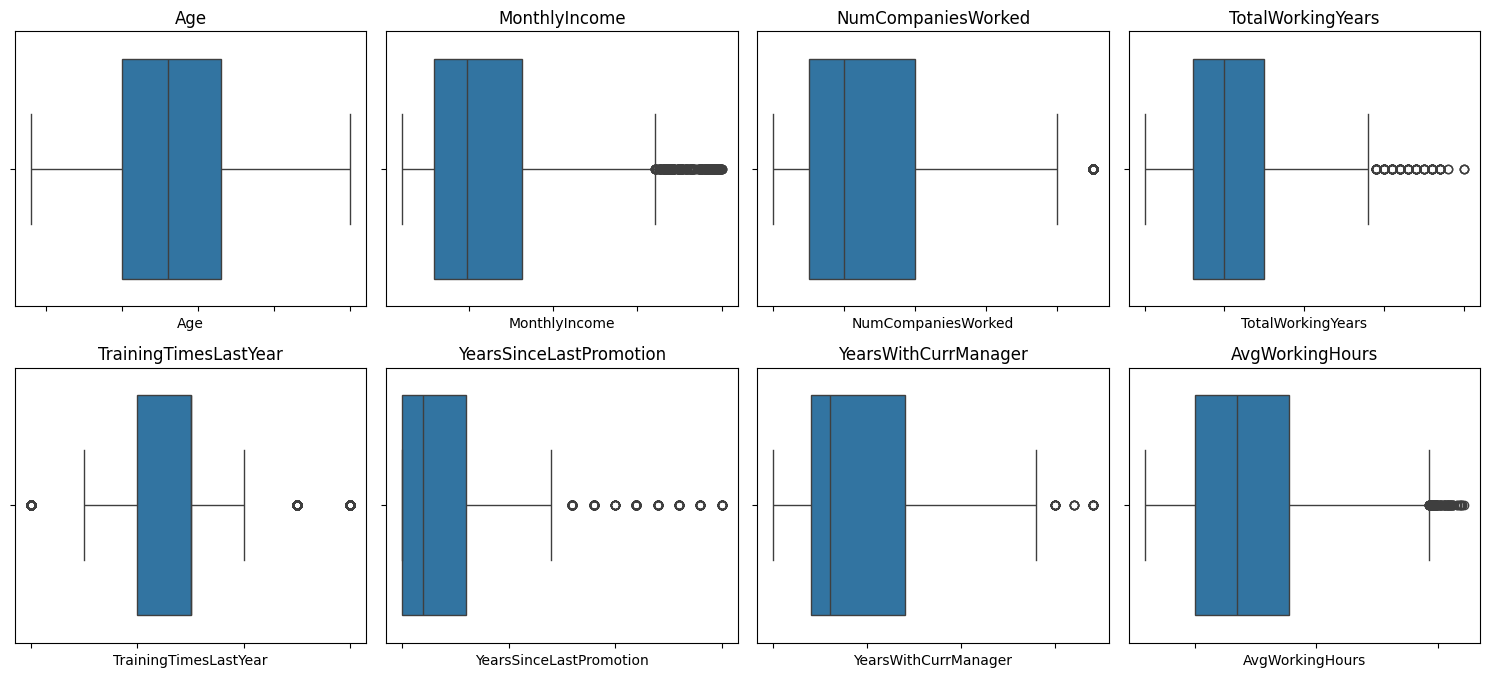

In [67]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=x_train[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

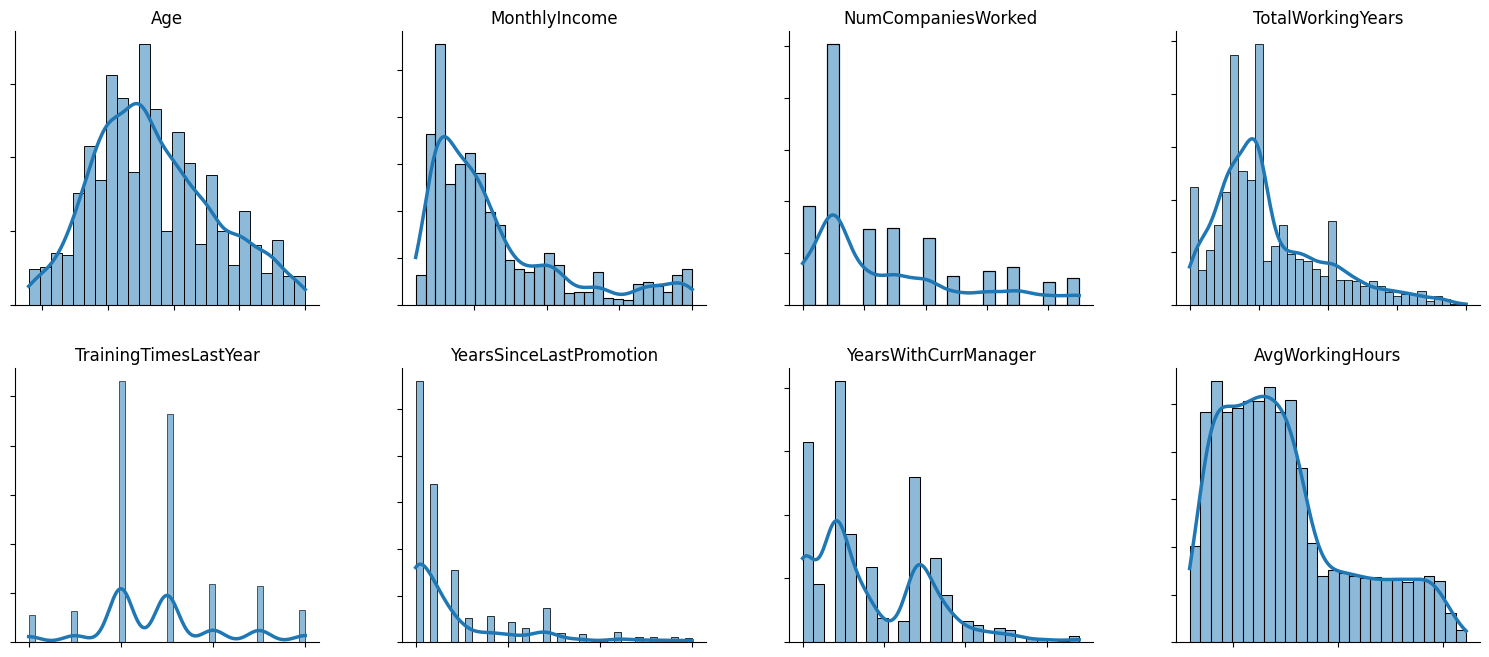

In [68]:
# Pre Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=x_train[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

In [69]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

# Custom log1p transformer
class LogTransformer(BaseEstimator, TransformerMixin):
	def fit(self, x, y=None):
		return self

	def transform(self, x):
		return np.log1p(x)

# Numeric transformation pipeline
num_pipeline = Pipeline([
	('log', LogTransformer()),
	('scaler', RobustScaler())
])

# Pipeline
num_preprocessor = ColumnTransformer([
	('num', num_pipeline, final_num_columns)
])

In [70]:
# apply pipeline
x_train[final_num_columns] = num_preprocessor.fit_transform(x_train[final_num_columns])
x_test[final_num_columns] = num_preprocessor.transform(x_test[final_num_columns])

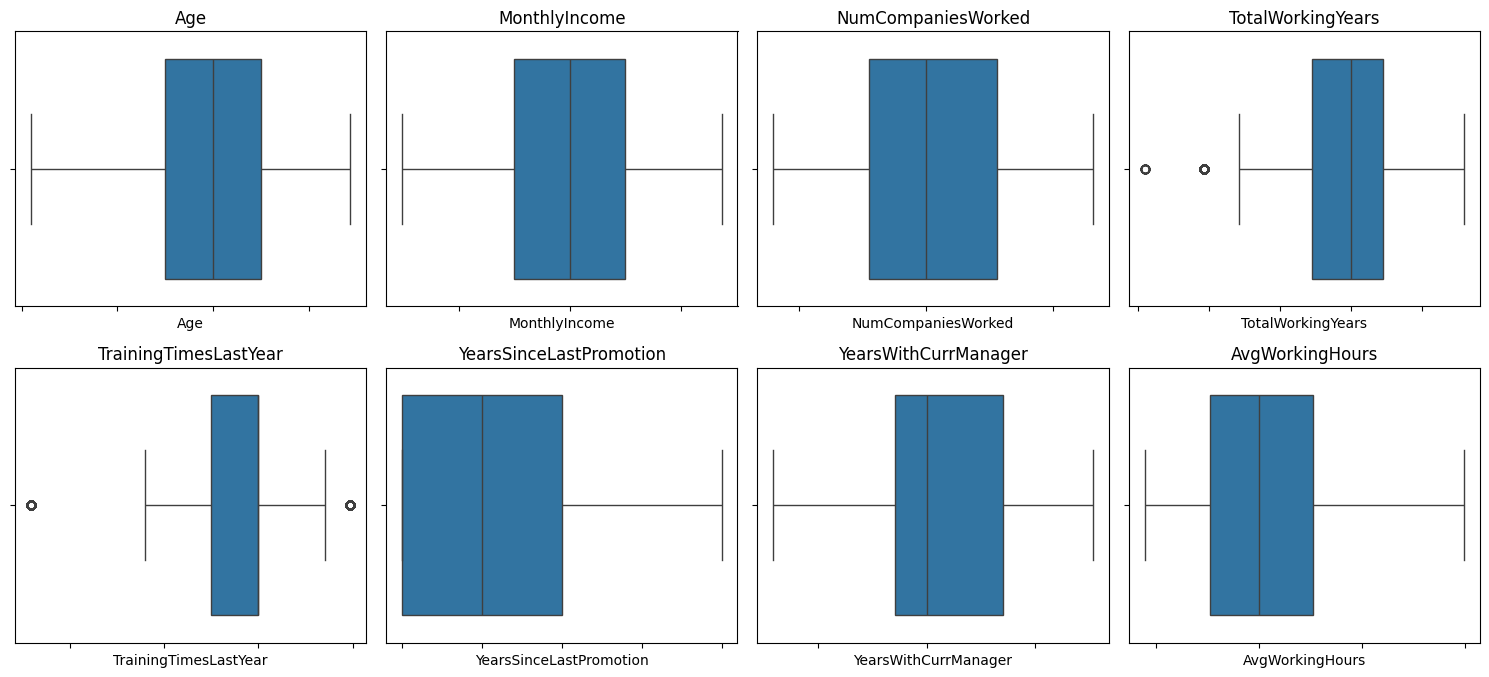

In [71]:
# Post Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.boxplot(x=x_train[column])
  plt.title(column)
  plt.xticks(visible=False)
  plt.tight_layout()

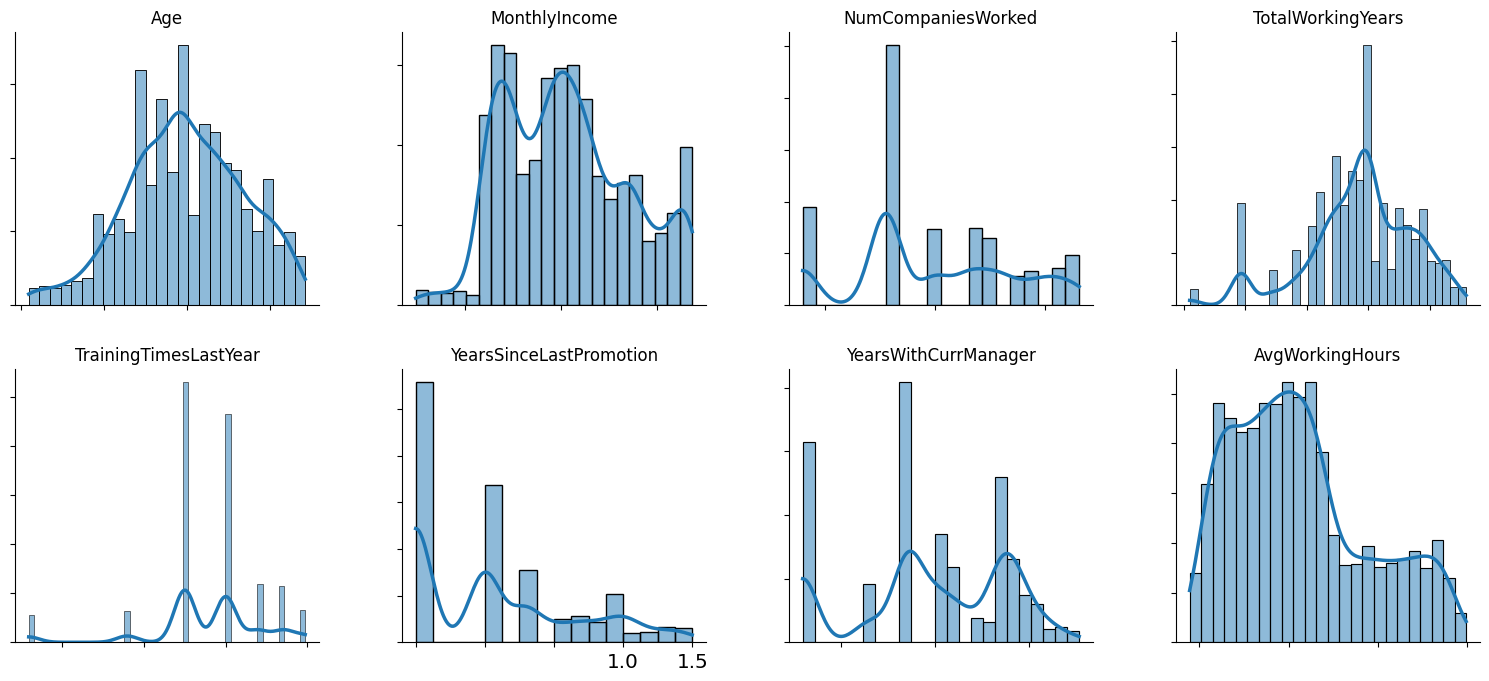

In [72]:
# Post Transformation and Rescale
plt.figure(figsize=(15, 10))

for i, column in enumerate(final_num_columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(x=x_train[column], kde=True)
  plt.title(column)
  plt.tight_layout()
  plt.xticks(visible=False)
  plt.yticks(visible=False)
  plt.xlabel('')
  plt.ylabel('')
  plt.grid(False)
  plt.gca().spines['top'].set_visible(False)
  plt.gca().spines['right'].set_visible(False)
  # plt.gca().spines['bottom'].set_visible(False)
  # plt.gca().spines['left'].set_visible(False)

plt.show()

## Data Encode

In [73]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

### Ordinal Encoding

In [74]:
# To see each ordinal categoric's values
for col in final_ordinal_cat_columns:
  print(f'{col}: {x_train[col].unique()}')

BusinessTravel: [1 2 0]
JobLevel: [1 2 5 4 3]
EnvironmentSatisfaction: [2 3 1 4]
JobSatisfaction: [4 1 2 3]
WorkLifeBalance: [4 3 2 1]
JobInvolvement: [3 2 1 4]


In [75]:
# Declare the order
ordinal_categories = [
	sorted(x_train[col].dropna().unique().tolist())
	for col in final_ordinal_cat_columns
]

# Pipeline
ordinal_encode = Pipeline([
	('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

In [76]:
x_train[final_ordinal_cat_columns] = ordinal_encode.fit_transform(x_train[final_ordinal_cat_columns])
x_test[final_ordinal_cat_columns] = ordinal_encode.transform(x_test[final_ordinal_cat_columns])

In [77]:
# # Apply the order
# for col in final_ordinal_cat_columns:
#   order = list(range(min(x_train[col]), max(x_train[col]) + 1))
#   x_train[col] = x_train[col].astype('category').cat.set_categories(order, ordered=True)
#   x_test[col] = x_test[col].astype('category').cat.set_categories(order, ordered=True)

In [78]:
# # Ordered ordinal categoric
# for col in final_ordinal_cat_columns:
#   print(f'{col}: {x_train[col].unique()}')

### One Hot Encoding

In [79]:
# To see each nominal categoric's values
for col in final_ohe_columns:
  print(f'{col}: {x_train[col].unique()}')

Department: ['Research & Development' 'Sales' 'Human Resources']
EducationField: ['Life Sciences' 'Technical Degree' 'Human Resources' 'Medical'
 'Marketing' 'Other']
JobRole: ['Sales Representative' 'Research Scientist' 'Laboratory Technician'
 'Manager' 'Sales Executive' 'Research Director'
 'Healthcare Representative' 'Manufacturing Director' 'Human Resources']
MaritalStatus: ['Divorced' 'Single' 'Married']


In [80]:
# pipeline
ohe_encode = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Pipeline fitting
ohe_encode.fit(x_train[final_ohe_columns])

# Apply
x_train_ohe = ohe_encode.transform(x_train[final_ohe_columns])
x_test_ohe = ohe_encode.transform(x_test[final_ohe_columns])

# Transorm into dataframe
x_train_ohe = pd.DataFrame(x_train_ohe.toarray(), columns=ohe_encode.get_feature_names_out())
x_test_ohe = pd.DataFrame(x_test_ohe.toarray(), columns=ohe_encode.get_feature_names_out())

In [81]:
# merge
x_train = x_train.drop(columns=final_ohe_columns)
x_train = pd.merge(x_train, x_train_ohe, on=x_train.index)
x_train.index = x_train.pop('key_0')

x_test = x_test.drop(columns=final_ohe_columns)
x_test = pd.merge(x_test, x_test_ohe, on=x_test.index)
x_test.index = x_test.pop('key_0')

# remove index name
x_train.index.name = None
x_test.index.name = None

In [82]:
x_train

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2588,0.150324,-0.075369,0.000000,0.000000,-2.409421,-0.500000,0.000000,0.195986,1.0,0.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2354,0.621708,-0.472947,-0.442507,0.000000,-1.000000,0.000000,0.227505,0.873039,1.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
655,0.621708,-0.115721,0.000000,1.086204,0.000000,0.000000,1.120085,1.184763,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4339,1.183412,-0.582038,1.198978,1.467345,-4.818842,0.292481,1.413390,-0.796217,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3557,0.558947,-0.615670,-0.442507,0.782199,0.000000,1.403677,1.533475,0.282215,1.0,1.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,-0.899711,-0.006777,0.924704,-0.546748,-1.000000,0.000000,-0.293305,0.505090,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
466,-1.119473,0.860426,-0.442507,-0.733218,0.000000,0.500000,-0.293305,-0.358258,1.0,0.0,3.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3092,-0.505224,-0.677004,0.000000,0.105254,1.409421,-0.500000,-0.293305,0.092577,1.0,0.0,2.0,3.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3772,-0.598855,-0.714601,0.313964,-0.115293,1.409421,-0.500000,0.706695,-0.865798,1.0,0.0,2.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Target Encoding

In [83]:
# Encode the target
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

## Data Balancing

In [84]:
# Checking Imbalance
y_train.value_counts()

,count
Attrition,
0,2958
1,569


In [85]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3527, 31), (3527,), (882, 31), (882,))

In [86]:
'''
Since the are containing ordinal categoric data, use SMOTENC to balance the data.
If u use SMOTE, those syntethic ordinal data will be lost, which lead to missing values.
'''
# smotenc
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC(categorical_features=[i for i in range(len(final_ordinal_cat_columns))], random_state=42)

x_train, y_train = smotenc.fit_resample(x_train, y_train)

In [87]:
# Checking Imbalance
y_train.value_counts()

,count
Attrition,
0,2958
1,2958


## Unite Pipeline

In [88]:
# unite pipeline
preprocessor = ColumnTransformer([
	('num', num_preprocessor, final_num_columns),
	('ordinal', ordinal_encode, final_ordinal_cat_columns),
	('ohe', ohe_encode, final_ohe_columns)
])

# Final Data

In [89]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5916 entries, 0 to 5915
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5916 non-null   float64
 1   MonthlyIncome                      5916 non-null   float64
 2   NumCompaniesWorked                 5916 non-null   float64
 3   TotalWorkingYears                  5916 non-null   float64
 4   TrainingTimesLastYear              5916 non-null   float64
 5   YearsSinceLastPromotion            5916 non-null   float64
 6   YearsWithCurrManager               5916 non-null   float64
 7   AvgWorkingHours                    5916 non-null   float64
 8   BusinessTravel                     5916 non-null   float64
 9   JobLevel                           5916 non-null   float64
 10  EnvironmentSatisfaction            5916 non-null   float64
 11  JobSatisfaction                    5916 non-null   float

In [90]:
x_train.head(3)

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.150324,-0.075369,0.000000,0.000000,-2.409421,-0.5,0.000000,0.195986,1.0,0.0,1.0,3.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.621708,-0.472947,-0.442507,0.000000,-1.000000,0.0,0.227505,0.873039,1.0,1.0,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.621708,-0.115721,0.000000,1.086204,0.000000,0.0,1.120085,1.184763,1.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
x_test.head(3)

,Age,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager,AvgWorkingHours,BusinessTravel,JobLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1413,0.859803,0.620694,-0.442507,-0.385221,1.409421,0.0,0.706695,1.335948,0.0,1.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3352,-0.795864,-0.827661,-0.442507,-2.062166,1.409421,-0.5,-1.413390,0.159091,1.0,0.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3970,-0.078238,-0.111921,0.000000,0.453252,0.000000,0.0,0.706695,-0.301428,0.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# ML Modeling

## Algorithm Setup

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

## Model Pipeline

In [102]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

'''
Use algorithm pipelines to simplify the model building process.
'''
# Algorithm Pipelines
lgr_pipeline = Pipeline([
  ('logreg', LogisticRegression())
])

gbc_piplene = Pipeline([
  ('gbc', GradientBoostingClassifier())
])

knn_pipeline = Pipeline([
  ('knn', KNeighborsClassifier())
])

dt_pipeline = Pipeline([
  ('dt', DecisionTreeClassifier())
])

rf_pipeline = Pipeline([
  ('rf', RandomForestClassifier())
])

ada_pipeline = Pipeline([
  ('ada', AdaBoostClassifier())
])

svm_pipeline = Pipeline([
  ('svm', SVC(probability=True))
])

nb_pipeline = Pipeline([
  ('nb', GaussianNB())
])

xgb_pipeline = Pipeline([
  ('xgb', XGBClassifier(enable_categorical= True))
])

'''
Unite all pipelines to a dictionary for easy access.
'''
all_pipelines = {
  'logreg': lgr_pipeline,
  'gbc': gbc_piplene,
  'knn': knn_pipeline,
  'dt': dt_pipeline,
  'rf': rf_pipeline,
  'ada': ada_pipeline,
  'svm': svm_pipeline,
  'nb': nb_pipeline,
  'xgb': xgb_pipeline
}

## Hyperparameter Tuning

In [103]:
'''
These hyperparameter will be used as its model baseline's parameter.
Best model out of these will be used for further modelling.
'''
# Base Hyperparameter
param_grid = [
  {
    'model': [all_pipelines['logreg']],
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
  },
  {
    'model': [all_pipelines['gbc']],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
  },
  {
    'model': [all_pipelines['knn']],
    'model__n_neighbors': [3, 5, 7]
  },
  {
    'model': [all_pipelines['dt']],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
  },
  {
    'model': [all_pipelines['rf']],
    'model__n_estimators': [100, 200],
    'model__max_depth': [5, 10, None]
  },
  {
    'model': [all_pipelines['ada']],
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.5, 1.0]
  },
  {
    'model': [all_pipelines['svm']],
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf']
  },
  {
    'model': [all_pipelines['nb']]
  },
  {
    'model': [all_pipelines['xgb']],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
  }
]

## Modeling and Evaluation

In [104]:
'''
The target is binary and balanced in terms of labels.
Therefore, the best metrics to evaluate the model is ROC-AUC, accuracy and f1 score.
'''
roc_auc_scores = []
accuracy_scores = []
f1_scores = []
pipeline_names = []

'''
This loop will apply all the model to the data and evaluate the model's performance.
'''
for name, pipeline in all_pipelines.items():
  print(name)
  pipeline.fit(x_train, y_train)
  y_pred_train = pipeline.predict(x_train)
  y_pred_test = pipeline.predict(x_test)
  # train classification report
  print(classification_report(y_train, y_pred_train))
  # test classification report
  print(classification_report(y_test, y_pred_test))
  # accuracy
  print(f'{name} train accuracy: {pipeline.score(x_train, y_train)}')
  print(f'{name} test accuracy: {pipeline.score(x_test, y_test)}')
  accuracy_scores.append(pipeline.score(x_test, y_test))
  # f1 score
  print(f'{name} train f1 score: {f1_score(y_train, y_pred_train)}')
  print(f'{name} test f1 score: {f1_score(y_test, y_pred_test)}')
  f1_scores.append(f1_score(y_test, y_pred_test))
  # recall
  print(f'{name} train recall: {pipeline.score(x_train, y_train)}')
  print(f'{name} test recall: {pipeline.score(x_test, y_test)}')
  # cross val
  print(f'{name} cross val score: {cross_val_score(pipeline, x_train, y_train, cv=5).mean()}')
  # log loss
  print(f'Log Loss:' + str(log_loss(y_test, pipeline.predict_proba(x_test))))
  # roc-auc scores
  print(f'ROC-AUC Score:' + str(roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1])))
  roc_auc_scores.append(roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1]))
  pipeline_names.append(name)
  print('='*50)

logreg
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      2958
           1       0.77      0.78      0.78      2958

    accuracy                           0.78      5916
   macro avg       0.78      0.78      0.78      5916
weighted avg       0.78      0.78      0.78      5916

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       741
           1       0.34      0.65      0.45       141

    accuracy                           0.74       882
   macro avg       0.63      0.71      0.64       882
weighted avg       0.83      0.74      0.77       882

logreg train accuracy: 0.7758620689655172
logreg test accuracy: 0.7437641723356009
logreg train f1 score: 0.7765419615773509
logreg test f1 score: 0.44878048780487806
logreg train recall: 0.7758620689655172
logreg test recall: 0.7437641723356009
logreg cross val score: 0.7726531264992803
Log Loss:0.541226543153715
ROC-AUC Score:0.7588556

## Evaluation Comparison

In [105]:
'''
As what has been said before, the best metrics to evaluate the model is ROC-AUC, accuracy and f1 score.
The higher the score, the better the model.
'''
model_evaluation = pd.DataFrame({
    'Model': pipeline_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'ROC-AUC Score': roc_auc_scores
})
'''
The evaluation scores will be compared among all the models, leading to its ranking.
The best model will be the one with the highest ranking as of overall,
and will be used for further modelling.
'''
model_evaluation['accuracy_rank'] = model_evaluation['Accuracy'].rank(ascending=False)
model_evaluation['f1_score_rank'] = model_evaluation['F1 Score'].rank(ascending=False)
model_evaluation['roc_auc_score_rank'] = model_evaluation['ROC-AUC Score'].rank(ascending=False)
model_evaluation['overall_rank'] = model_evaluation[['accuracy_rank', 'f1_score_rank', 'roc_auc_score_rank']].mean(axis=1)

In [106]:
model_evaluation.sort_values(by='overall_rank', ascending=True)

,Model,Accuracy,F1 Score,ROC-AUC Score,accuracy_rank,f1_score_rank,roc_auc_score_rank,overall_rank
4,rf,0.986395,0.956835,0.999196,1.0,1.0,1.0,1.000000
8,xgb,0.984127,0.951049,0.998631,2.0,2.0,2.0,2.000000
3,dt,0.964853,0.892734,0.944626,3.0,3.0,4.0,3.333333
6,svm,0.857143,0.627219,0.879346,5.0,4.0,5.0,4.666667
2,knn,0.807256,0.600939,0.951618,6.0,5.0,3.0,4.666667
1,gbc,0.862812,0.592593,0.861200,4.0,6.0,6.0,5.333333
5,ada,0.772109,0.466844,0.777754,7.0,7.0,7.0,7.000000
0,logreg,0.743764,0.448780,0.758856,8.0,8.0,8.0,8.000000
7,nb,0.599773,0.317215,0.643725,9.0,9.0,9.0,9.000000


In [107]:
# Best classifier model
best_model = all_pipelines[model_evaluation.sort_values(by='overall_rank', ascending=True)['Model'].iloc[0]]

best_model

Pipeline(steps=[('rf', RandomForestClassifier())])

# Best Model: Random Forest Hyperparameter Tuning

## Pre-Tune

In [108]:
'''
Let's evaluate the model's pre-tuned hyperparameter.
'''
best_model.fit(x_train, y_train)

y_pred_train = best_model.predict(x_train)
y_pred_test = best_model.predict(x_test)

# algorithm name
print(best_model.steps[0][1].__class__.__name__)
# train classification report
print(classification_report(y_train, y_pred_train))
# test classification report
print(classification_report(y_test, y_pred_test))
# accuracy
print(f'Best Model train accuracy: {best_model.score(x_train, y_train)}')
print(f'Best Model test accuracy: {best_model.score(x_test, y_test)}')
pre_tune_accuracy = best_model.score(x_test, y_test)
# f1 score
print(f'Best Model train f1 score: {f1_score(y_train, y_pred_train)}')
print(f'Best Model test f1 score: {f1_score(y_test, y_pred_test)}')
pre_tune_f1 = f1_score(y_test, y_pred_test)
# cross val
print(f'Best Model cross val score: {cross_val_score(best_model, x_train, y_train, cv=5).mean()}')
pre_tune_cv = cross_val_score(best_model, x_train, y_train, cv=5).mean()
# log loss
print(f'Log Loss:' + str(log_loss(y_test, best_model.predict_proba(x_test))))
pre_tune_ll = log_loss(y_test, best_model.predict_proba(x_test))
# roc-auc scores
print(f'ROC-AUC Score:' + str(roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])))
pre_tune_roc = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00      2958

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       741
           1       0.96      0.97      0.97       141

    accuracy                           0.99       882
   macro avg       0.98      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882

Best Model train accuracy: 1.0
Best Model test accuracy: 0.9897959183673469
Best Model train f1 score: 1.0
Best Model test f1 score: 0.9681978798586572
Best Model cross val score: 0.9707726005802929
Log Loss:0.09829781248245212
ROC-AUC Score:0.9991673127171448


## Tuning

In [109]:
'''
In the purpose of increasing the model's performance,
the hyperparameter will be tuned using RandomizedSearchCV.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Hyperparameter
param_dist = {
  'n_estimators': [100, 200, 300, 500, 800],
  'max_depth': [None, 10, 20, 30, 50],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['sqrt', 'log2'],
  'bootstrap': [True, False]
}

# Initialize model
model = best_model.steps[0][1]

# Search the best parameter
random_search = RandomizedSearchCV(
  estimator=model,
  param_distributions=param_dist,
  n_iter=50,
  cv=5,
  scoring='f1',
  verbose=2,
  random_state=42,
  n_jobs=-1
)

# Search best
random_search.fit(x_train, y_train)

# Best classifier model
classifier = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}


In [110]:
classifier

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='log2')

## Tuned

In [111]:
'''
Let's evaluate the model's tuned hyperparameter.
'''
classifier.fit(x_train, y_train)

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

# algorithm name
print(classifier.__class__.__name__)
# train classification report
print(classification_report(y_train, y_pred_train))
# test classification report
print(classification_report(y_test, y_pred_test))
# accuracy
print(f'Best Model train accuracy: {classifier.score(x_train, y_train)}')
print(f'Best Model test accuracy: {classifier.score(x_test, y_test)}')
optimized_rf_accuracy = classifier.score(x_test, y_test)
# f1 score
print(f'Best Model train f1 score: {f1_score(y_train, y_pred_train)}')
print(f'Best Model test f1 score: {f1_score(y_test, y_pred_test)}')
optimized_rf_f1 = f1_score(y_test, y_pred_test)
# cross val
print(f'Best Model cross val score: {cross_val_score(classifier, x_train, y_train, cv=5).mean()}')
optimized_rf_cv = cross_val_score(classifier, x_train, y_train, cv=5).mean()
# log loss
print(f'Log Loss:' + str(log_loss(y_test, classifier.predict_proba(x_test))))
optimized_rf_ll = log_loss(y_test, classifier.predict_proba(x_test))
# roc-auc scores
print(f'ROC-AUC Score:' + str(roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])))
optimized_rf_roc = roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1])

RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00      2958

    accuracy                           1.00      5916
   macro avg       1.00      1.00      1.00      5916
weighted avg       1.00      1.00      1.00      5916

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       0.98      0.97      0.98       141

    accuracy                           0.99       882
   macro avg       0.99      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Best Model train accuracy: 1.0
Best Model test accuracy: 0.9920634920634921
Best Model train f1 score: 1.0
Best Model test f1 score: 0.9750889679715302
Best Model cross val score: 0.9753346964885428
Log Loss:0.04136467844280036
ROC-AUC Score:0.9994831596175381


## Model Evaluation: Pre-Tune vs Tuned

Note: higher numbers are better for every metrics except log loss.

In [112]:
'''
Compare the pre-tuned and tuned model's performance.
'''
comparison = pd.DataFrame({
    'Model': ['Pre-Tune', 'Tuned'],
    'Accuracy': [pre_tune_accuracy, optimized_rf_accuracy],
    'F1 Score': [pre_tune_f1, optimized_rf_f1],
    'Cross Validation': [pre_tune_cv, optimized_rf_cv],
    'Log Loss': [pre_tune_ll, optimized_rf_ll],
    'ROC-AUC Score': [pre_tune_roc, optimized_rf_roc]
})

In [113]:
'''
Higher score means better performance
at every metrics, except log loss.
'''
comparison

,Model,Accuracy,F1 Score,Cross Validation,Log Loss,ROC-AUC Score
0,Pre-Tune,0.989796,0.968198,0.971110,0.098298,0.999167
1,Tuned,0.992063,0.975089,0.973139,0.041365,0.999483


## Features Importance

BaseFeature
AvgWorkingHours            0.101079
TotalWorkingYears          0.100060
JobRole                    0.082876
MaritalStatus              0.082504
YearsWithCurrManager       0.072190
Age                        0.072056
MonthlyIncome              0.062070
JobSatisfaction            0.056410
EducationField             0.054584
EnvironmentSatisfaction    0.047230
BusinessTravel             0.036851
JobLevel                   0.035780
NumCompaniesWorked         0.035101
WorkLifeBalance            0.034671
TrainingTimesLastYear      0.033775
YearsSinceLastPromotion    0.032971
JobInvolvement             0.032101
Department                 0.027692
Name: Importance, dtype: float64


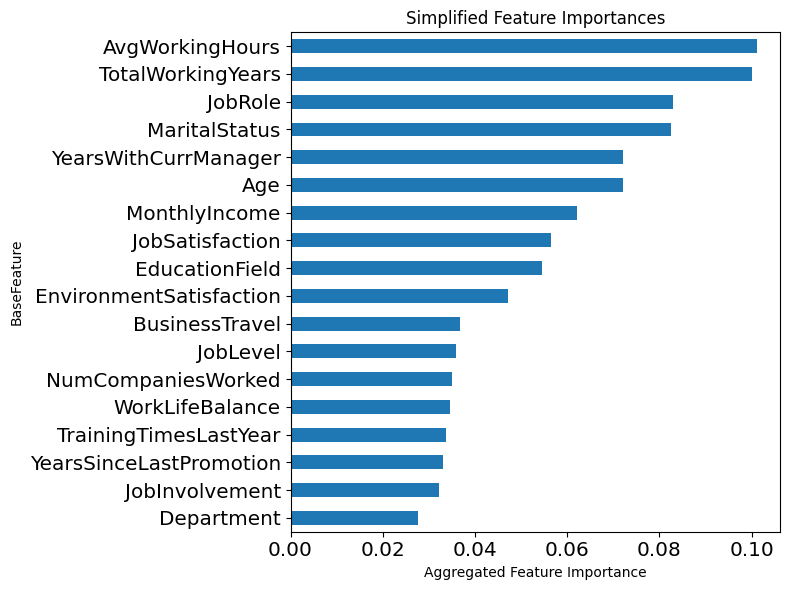

In [114]:
# Feature Importance
importances = classifier.feature_importances_
feature_names = x_train.columns

# Feature Importance into dataframe
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Extract base feature name
feat_df['BaseFeature'] = feat_df['Feature'].str.extract(r'^([^_]+)')
grouped_feat = feat_df.groupby('BaseFeature')['Importance'].sum().sort_values(ascending=False)

# Sort by its importances' value
print(grouped_feat)

# Plot grouped importances
plt.figure(figsize=(8, 6))
grouped_feat.plot(kind='barh')
plt.xlabel('Aggregated Feature Importance')
plt.title('Simplified Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Model Export

In [ ]:
# Export the model
import joblib

joblib.dump(classifier, 'classifier_model.pkl')